<h2><center>Applied Machine Learning - Assignment 1</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<h3>Question 1 - Pandas and Numpy</h3>

<h4>Task a:</h4>
<p>Write a program that reads the provided text file and counts the occurrences of unique words. The program
should include all words in the count.</p>

<h4>Solution</h4>
<p>To count the words of the entire text file, we use the spaces between the words to separate them. We also
need to lowercase all words and remove punctuation to avoid the same word being counted differently:</p>

In [2]:
import re

text_file = open('res/text.txt', 'r', encoding = 'utf-8')
text_content = text_file.read()
text_file.close()

text_content = text_content.lower()

# Remove punctuation
text_content = re.sub(r'[^\w\s]', ' ', text_content)

# Count word frequencies
word_count = {}
words = text_content.split()
for word in words:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sorted_words = sorted(word_count.items(), key = lambda x: x[1], reverse = True)

# Top 10 most frequent words
for word, count in sorted_words[:10]:
    print(f'{word}: {count}')

br: 44
logical: 41
the: 22
and: 19
zonotopes: 18
of: 18
polynomial: 15
a: 15
for: 13
to: 12


<h4>Task b:</h4>
<p>Modify the program to exclude common words such as ’the’, ’a’, ’an’, and ’be’ from the count. Finally,
generate a histogram displaying the top 10 most frequent words.
Text file for tasks a & b: https://raw.githubusercontent.com/aalanwar/Logical-Zonotope/
refs/heads/main/README.md</p>

<h4>Solution</h4>
<p>We will add a list of excluded words. Before we count every single word, we check whether it is
excluded or not:</p>

In [3]:
text_file = open('res/text.txt', 'r', encoding = 'utf-8')
text_content = text_file.read()
text_file.close()

text_content = text_content.lower()

# Remove punctuation
text_content = re.sub(r'[^\w\s]', ' ', text_content)

# Excluded words
excluded_words = ['the', 'a', 'an', 'be']

# Count word frequencies
word_count = {}
words = text_content.split()
for word in words:
    if word not in excluded_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

<p>To plot the top 10 words, we first create a list of all words sorted by the number of occurrences so that we only include the top 10 in our plot.</p>

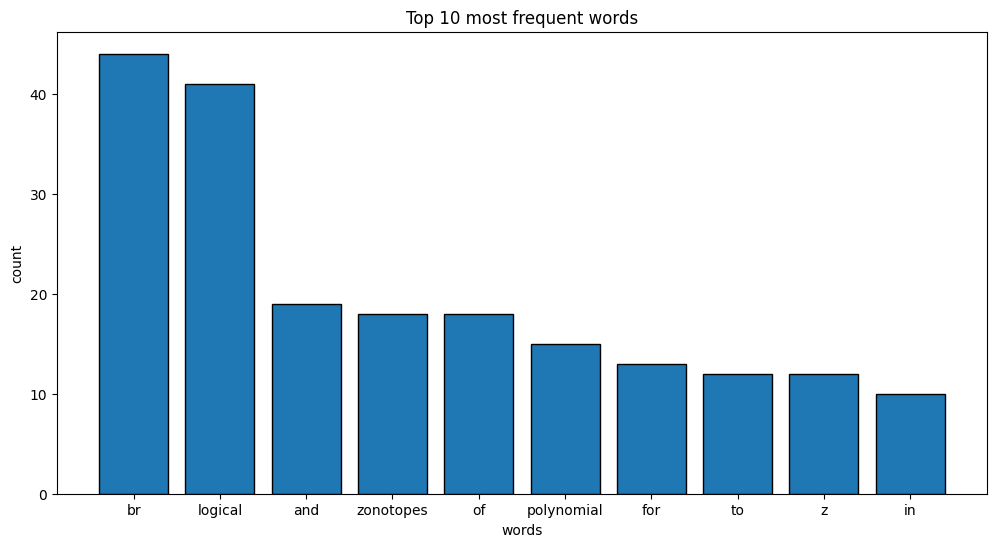

In [4]:
sorted_words = sorted(word_count.items(), key = lambda x: x[1], reverse = True)

words = [item[0] for item in sorted_words[:10]]
counts = [item[1] for item in sorted_words[:10]]

plt.figure(figsize = (12,6))
plt.bar(words, counts, edgecolor = 'black')
plt.title('Top 10 most frequent words')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

<p>Something is noticeable in the graph: The word “br”, which does not exist in the dictionary, is used most
often. A closer inspection of the text file reveals that this is the HTML element break, which inserts a line
break at the desired line. In order to find the top 10 most used words really precisely, we could now add
words like these to our list of excluded words.</p>

<h4>Task c:</h4>
<p>Using Numpy for matrix operations: Create a matrix A with dimensions 100 × 20 (n = 100, m = 20).
Initialize matrix A with random values. Then, create a vector v of size 20 × 1 and initialize it with
values from a normal distribution, where the mean µ is 2 and the standard deviation σ is 0.01. Perform
the following operations:</p>
<ul>
    <li>Iteratively multiply each row of matrix A element-wise by vector v, and accumulate the results
into a new vector c.</li>
    <li>Calculate the mean and standard deviation of vector c.</li>
    <li>Plot a histogram of vector c using 5 bins.</li>
</ul>

In [5]:
A = np.random.rand(100, 20)

v = np.random.normal(2, 0.01, (20, 1))

<h4>Task 1.c.1</h4>
<p>Iteratively multiply each row of matrix A element-wise by vector v, and accumulate the results into a new vector c.</p>
<h4>Solution</h4>

In [6]:
c = A @ v

<h4>Task 1.c.2</h4>
<p>Calculate the mean and standard deviation of vector c.</p>
<h4>Solution</h4>

In [7]:
mean = c.mean()
std = c.std()

<h4>Task 1.c.3</h4>
<p>Plot a histogram of vector c using 5 bins.</p>
<h4>Solution</h4>

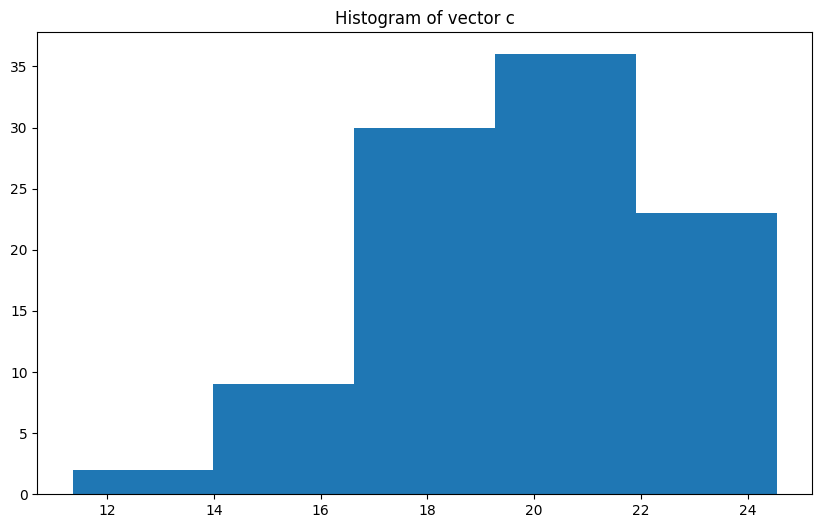

In [8]:
plt.figure(figsize = (10,6))
plt.hist(c, bins = 5)
plt.title('Histogram of vector c')
plt.show()

<h3>Question 2 - Linear Regression</h3>
<ul>
    <li>Generate 3 sets of simple data. i.e. a matrix A with dimensions 100 x 2. Initialize it with normal
distribution $\mu$ = 2 and $\sigma$ = [0.01, 0.1, 1].</li>
    <li>Implement the ”Learn Simple Linear Regression” algorithm and train it using matrix A to learn
values of $\beta_0$ and $\beta_1$.</li>
    <li>Implement the ”Predict using Simple Linear Regression” algorithm and calculate the points for
each training example in matrix A.</li>
    <li>Plot the training points from matrix A and predicted values in the form of line graph.</li>
    <li>Comment on the effect that $\sigma$ has on the line that is predicted.</li>
    <li>Put $\beta_0$ to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of $\sigma$</li>
    <li>Put $\beta_1$ to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of $\sigma$</li>
    <li>Use numpy.linalg.lstsq to replace step 2 for learning values of $\beta_0$ and $\beta_1$.</li>
    <li>Use sklearn.linear_model.LinearRegression to replace step 2 for learning values of $\beta_0$ and $\beta_1$.</li>
    <li>Comment and compare between the results, do you see differences? why?</li>
</ul>

<h4>Task 2.1</h4>
<p>Generate 3 sets of simple data. i.e. a matrix A with dimensions 100 x 2. Initialize it with normal
distribution $\mu$ = 2 and $\sigma$ = [0.01, 0.1, 1].</p>
<h4>Solution</h4>

In [9]:
A_1 = np.random.normal(2, 0.01, (100, 2))
A_2 = np.random.normal(2, 0.1, (100, 2))
A_3 = np.random.normal(2, 1, (100, 2))

<h4>Task 2.2</h4>
<p>Implement the ”Learn Simple Linear Regression” algorithm and train it using matrix A to learn
values of $\beta_0$ and $\beta_1$.</p>

<h4>Solution</h4>
<p>First of all, we separate the data into x and y so that we can calculate the mean of both arrays using
numpy. Following the pseudocode given, we now calculate the numerator and denominator to obtain $\beta_1$.
We will use the numpy.sum() method, which allows us to sum up all the values created. Since we now have
$\beta_1$, we can also easily calculate $\beta_0$. Finally, we can return $\beta_0$ and $\beta_1$ in our simple regression
function:</p>

<img src = "res/Learn Simple Linear Regression Algorithm.png">

In [10]:
def learn_simple_linear_reg(data):
    x = data[:, 0]
    y = data[:, 1]

    x_mean = x.mean()
    y_mean = y.mean()

    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

<h4>Task 2.3</h4>
<p>Implement the ”Predict using Simple Linear Regression” algorithm and calculate the points for
each training example in matrix A.</p>
<h4>Solution</h4>

<img src = "res/Predict using Simple Linear Regression Algorithm.png">

In [11]:
def predict_simple_linear_reg(x, beta_0, beta_1):
    y_hat = beta_0 + beta_1 * x
    return y_hat

<h4>Task 2.4</h4>
<p>Plot the training points from matrix A and predicted values in the form of line graph.</p>
<h4>Solution</h4>

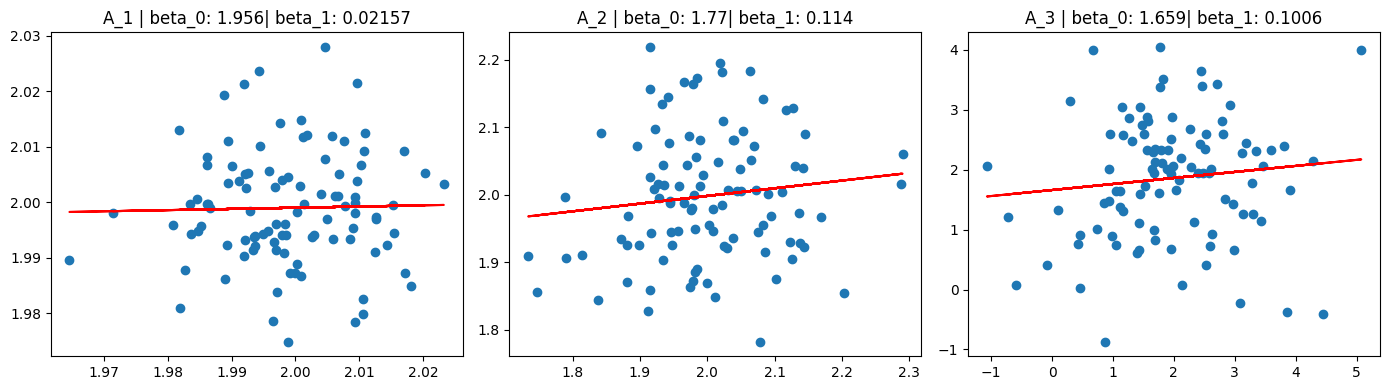

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (14,4))  
data = [A_1, A_2, A_3]

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1])

    beta_0, beta_1 = learn_simple_linear_reg(data[i])
    ax.plot(data[i][:, 0], predict_simple_linear_reg(data[i][:, 0], beta_0, beta_1), color = 'red')
    ax.set_title(f'A_{i + 1} | beta_0: {beta_0:.4}| beta_1: {beta_1:.4}')

plt.tight_layout()  
plt.show()

<h4>Task 2.5</h4>
<p>Comment on the effect that $\sigma$ has on the line that is predicted.</p>
<h4>Solution</h4>

<p>As $\sigma$ increases, the spread of the data points around the mean becomes larger, introducing more noise. With
low $\sigma$, the predicted line closely fits the data, resulting in highly accurate predictions. However, as $\sigma$ grows, the data points scatter more widely, leading to less reliable predictions and a poorer fit of the regression line.
Effect of $\sigma$ on $\beta_0$ and $\beta_1$:</p>
<ul>
    <li>if $\sigma$ = 0 -> $\beta_0$ = mean (in our case = 2), $\beta_1$ = 0</li>
    <li>if $\sigma$ > 0 -> |$\beta_1$| becomes larger, |$\beta_0$ - mean| becomes larger (error becomes larger)</li>
</ul>

<h4>Task 2.6</h4>
<p>Put $\beta_0$ to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of $\sigma$</p>
<h4>Solution</h4>

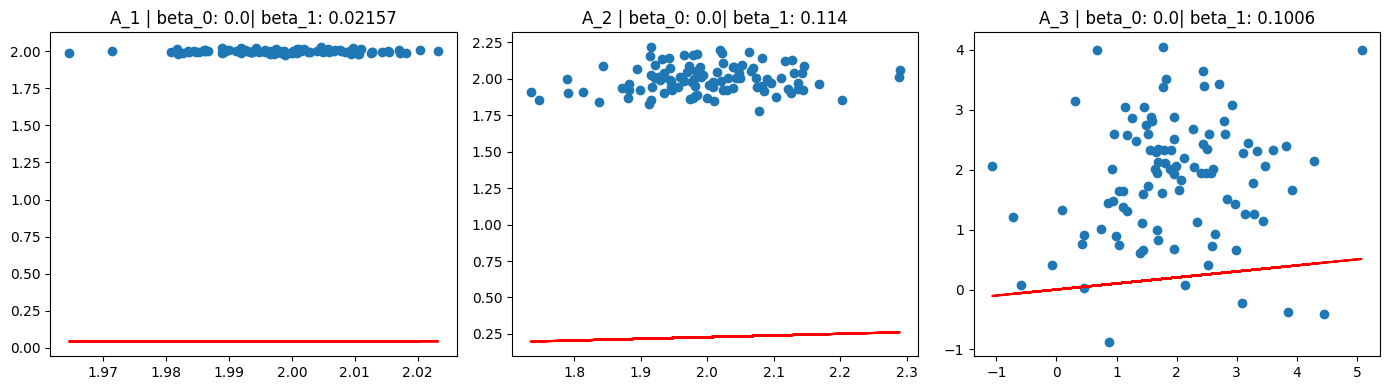

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (14,4))  
data = [A_1, A_2, A_3]

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1])

    beta_0, beta_1 = learn_simple_linear_reg(data[i])
    beta_0 = 0.0000
    
    ax.plot(data[i][:, 0], predict_simple_linear_reg(data[i][:, 0], beta_0, beta_1), color = 'red')
    ax.set_title(f'A_{i + 1} | beta_0: {beta_0:.4}| beta_1: {beta_1:.4}')

plt.tight_layout()  
plt.show()

<p>line/prediciton is shifted downwards -> far away from the data points -> inaccurate prediciton</p>

<h4>Task 2.7</h4>
<p>Put $\beta_1$ to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of $\sigma$</p>
<h4>Solution</h4>

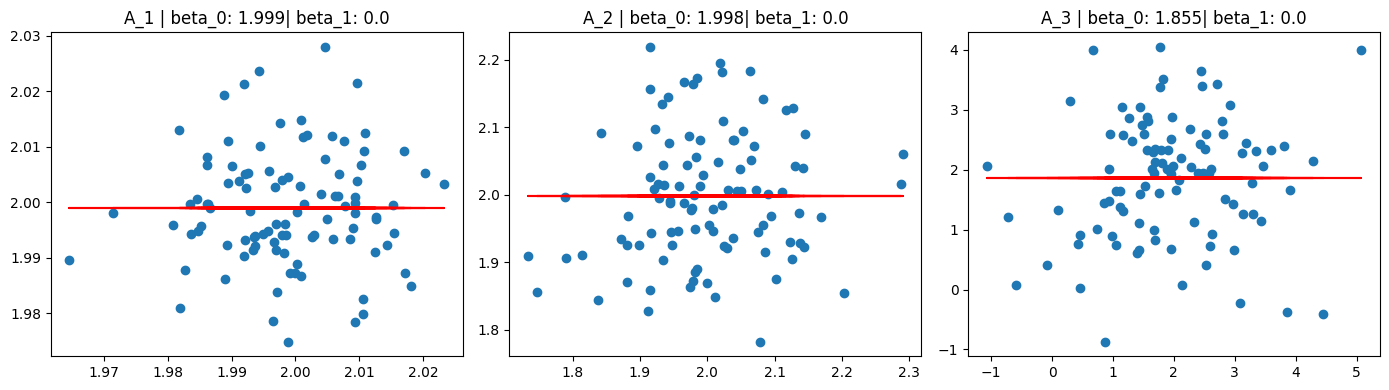

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (14,4))  
data = [A_1, A_2, A_3]

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1])

    # since beta_1 = 0, the calculation of beta_0 also changes
    beta_1 = 0.0000
    beta_0 = (data[i][:, 1]).mean()
    
    ax.plot(data[i][:, 0], predict_simple_linear_reg(data[i][:, 0], beta_0, beta_1), color = 'red')
    ax.set_title(f'A_{i + 1} | beta_0: {beta_0:.4}| beta_1: {beta_1:.4}')

plt.tight_layout()  
plt.show()

<ul>
    <li>Line is constantly equal to the mean of the y-values, approximately = 2 (our mean)</li>
    <li>Prediction line is not perfect, but functional/acceptable.</li>
</ul>

<h4>Task 2.8</h4>
<p>Use numpy.linalg.lstsq to replace step 2 for learning values of $\beta_0$ and $\beta_1$.</p>
<h4>Solution</h4>

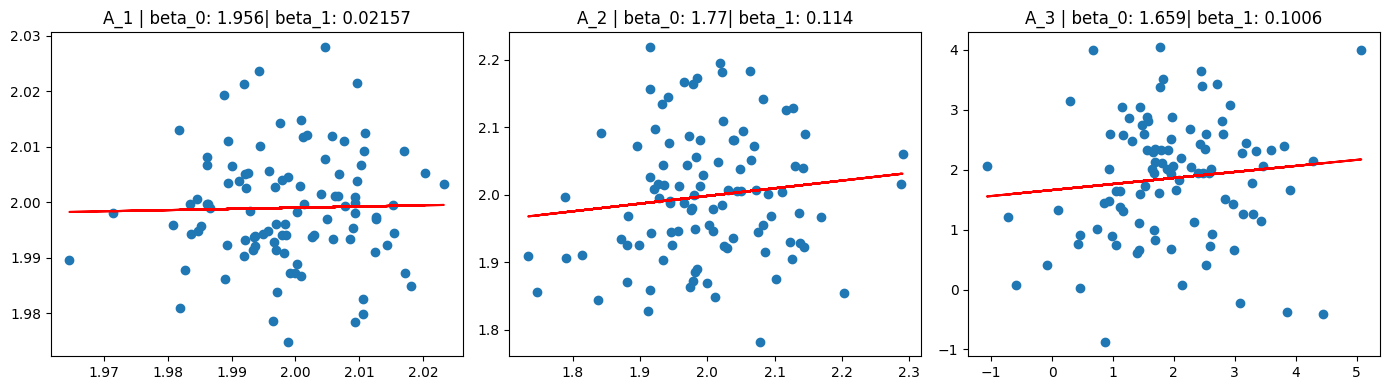

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (14,4))  
data = [A_1, A_2, A_3]

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1])

    X = np.column_stack((np.ones_like(data[i][:, 0]), data[i][:, 0]))
    y = data[i][:, 1]
    beta_0, beta_1 = np.linalg.lstsq(X, y, rcond = None)[0]
    
    ax.plot(data[i][:, 0], predict_simple_linear_reg(data[i][:, 0], beta_0, beta_1), color = 'red')
    ax.set_title(f'A_{i + 1} | beta_0: {beta_0:.4}| beta_1: {beta_1:.4}')

plt.tight_layout()  
plt.show()

<h4>Task 2.9</h4>
<p>Use sklearn.linear_model.LinearRegression to replace step 2 for learning values of $\beta_0$ and $\beta_1$.</p>
<h4>Solution</h4>

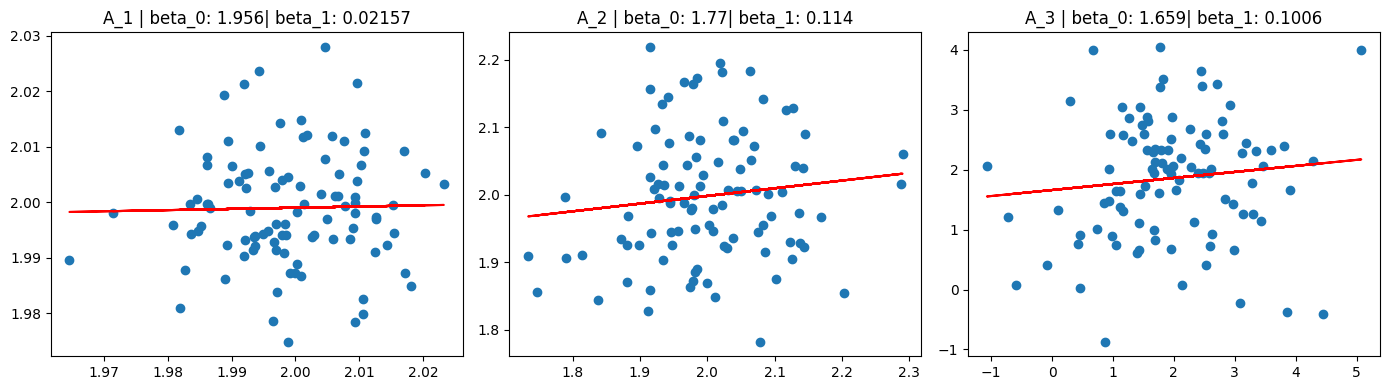

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (14,4))  
data = [A_1, A_2, A_3]

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1])

    model = LinearRegression()
    model.fit(data[i][:, 0].reshape(-1, 1), data[i][:, 1])
    beta_0, beta_1 = model.intercept_, model.coef_[0]
    
    ax.plot(data[i][:, 0], predict_simple_linear_reg(data[i][:, 0], beta_0, beta_1), color = 'red')
    ax.set_title(f'A_{i + 1} | beta_0: {beta_0:.4}| beta_1: {beta_1:.4}')

plt.tight_layout()  
plt.show()

<h4>Task 2.10</h4>
<p>Comment and compare between the results, do you see differences? why?</p>
<h4>Solution</h4>

<ul>
    <li>Graphical and numerical results are the same.</li>
    <li>There are slight rounding errors in the beta0 and beta1 parameters between the different methods.</li>
    <li>The calculation methods are equivalent (OLS) but differ slightly due to optimization techniques.</li>
</ul>